In [83]:
import pandas as pd

In [84]:
df = pd.read_csv('carprices.csv')
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [85]:
y = df['Sell Price($)']

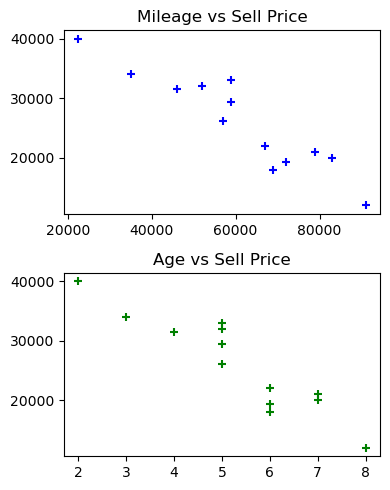

In [86]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 1, figsize = (4, 5))
axs[0].scatter(df['Mileage'], y, color = 'b', marker= '+')
axs[0].set_title('Mileage vs Sell Price')
axs[1].scatter(df['Age(yrs)'], y, color = 'g', marker = '+')
axs[1].set_title('Age vs Sell Price')
plt.tight_layout()
plt.show()

In [87]:
df_dummies = pd.get_dummies(df['Car Model'], dtype = 'int')
df_dummies.head()

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [88]:
df0 = pd.concat([df, df_dummies], axis= 1)
df0.head()

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0


In [89]:
y = df0['Sell Price($)']
X = df0.drop(['Car Model', 'Sell Price($)', 'Mercedez Benz C class'], axis =  1)
X.head()

,Mileage,Age(yrs),Audi A5,BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1


In [90]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
model.predict(X)

array([18705.2723644 , 35286.78445645, 24479.19112468, 41245.76426391,
       29882.98779056, 28023.6135243 , 30614.46818502, 21879.57266964,
       12182.34562104, 26183.72387884, 18929.31674102, 20409.80511857,
       30477.15426156])

In [91]:
model.score(X, y)

0.9417050937281083

In [92]:
model.predict([[45000,4,0,0]])

D:\Anaconda__\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36991.31721061])

In [93]:
model.predict([[86000,7,0,1]])

D:\Anaconda__\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11080.74313219])